In [23]:
import os
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
TOP_PATH = os.environ['PWD']

In [4]:
sys.path.append(TOP_PATH + '/config')
sys.path.append(TOP_PATH + '/src')

In [9]:
from trends import *
import etl
from get_date_range_df import get_data_from_range
import eda_viz

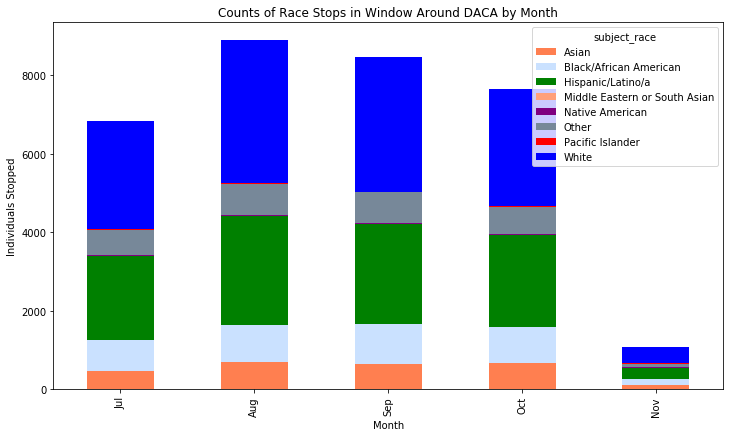

In [47]:
eda_viz.month_race_count_viz(('07-05-2017', '11-05-2017'), 'DACA', save_fig = True)

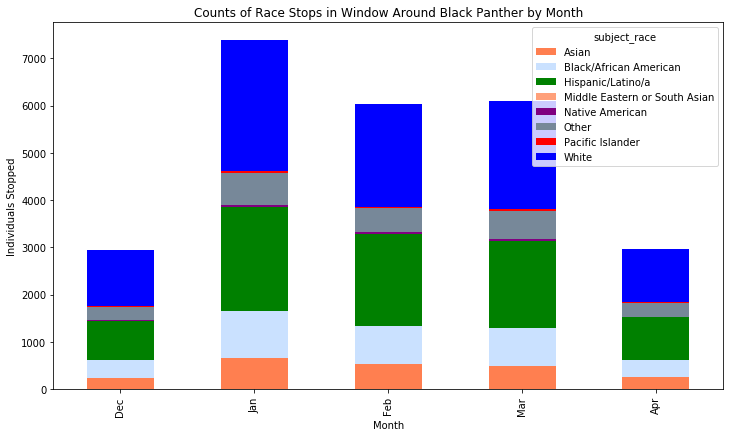

In [48]:
eda_viz.month_race_count_viz(('12-16-2017', '04-16-2018'), 'Black Panther', save_fig = True)

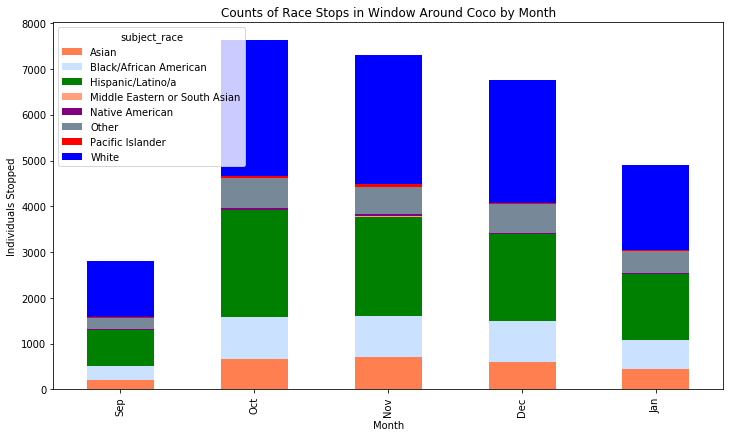

In [49]:
eda_viz.month_race_count_viz(('09-22-2017', '01-22-2018'), 'Coco', save_fig = True)

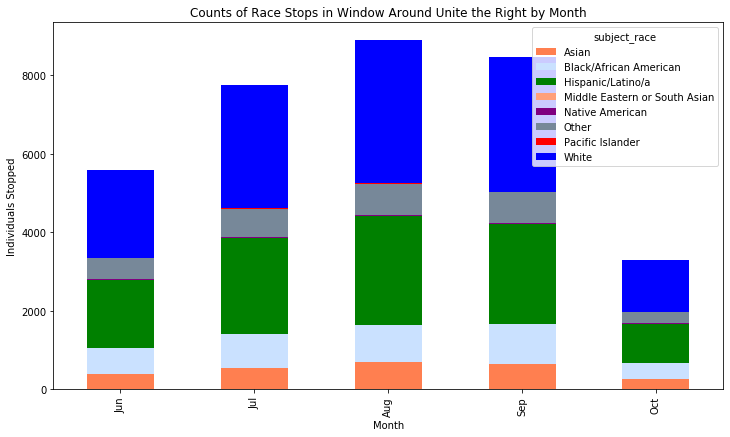

In [50]:
eda_viz.month_race_count_viz(('06-12-2017', '10-12-2017'), 'Unite the Right', save_fig = True)

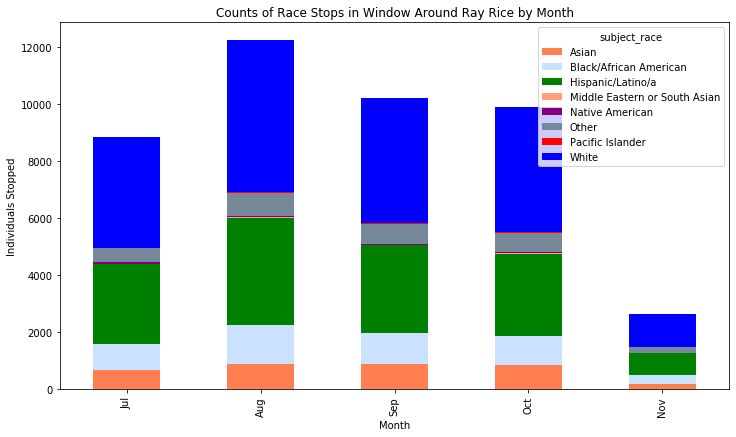

In [51]:
eda_viz.month_race_count_viz(('07-08-2014', '11-08-2014'), 'Ray Rice', save_fig = True)

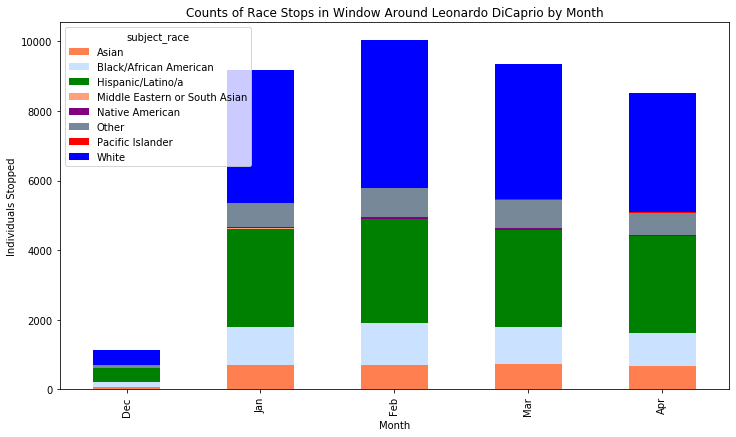

In [52]:
eda_viz.month_race_count_viz(('12-28-2015', '04-28-2016'), 'Leonardo DiCaprio', save_fig = True)

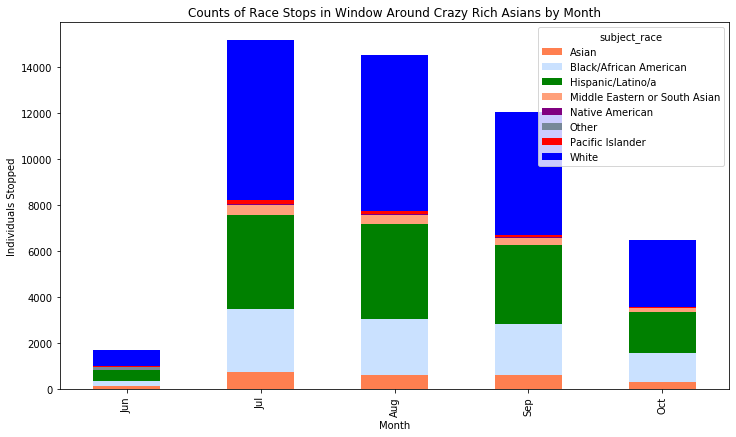

In [26]:
eda_viz.month_race_count_viz(('06-15-2018', '10-15-2018'), 'Crazy Rich Asians', save_fig = True)

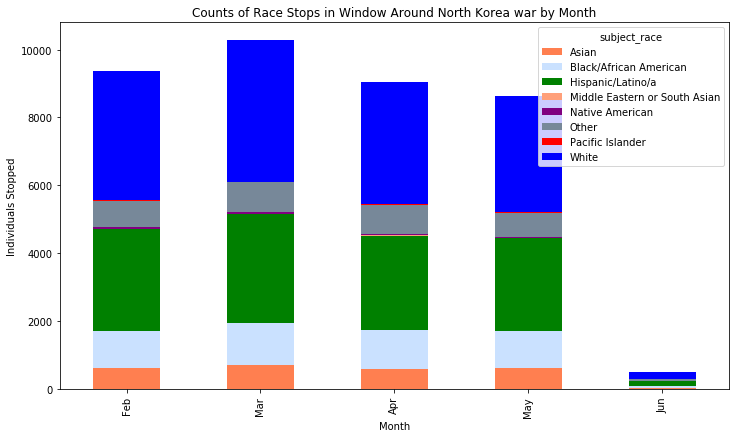

In [54]:
eda_viz.month_race_count_viz(('02-01-2017', '06-01-2017'), 'North Korea war', save_fig = True)

In [24]:
t = get_data_from_range(('06-15-2018', '10-15-2018'))

In [25]:
t.head()

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
135915,1619831,Moving Violation,240,White,Male,65.0,2018-06-15,07:25:00,N,N,NaN,N,N
135916,1619829,Moving Violation,240,White,Male,67.0,2018-06-15,07:53:00,N,N,NaN,N,N
135917,1619791,Moving Violation,930,White,Female,24.0,2018-06-15,07:30:00,N,N,NaN,N,N
135918,1619790,Moving Violation,930,White,Male,31.0,2018-06-15,07:35:00,N,N,NaN,N,N
135919,1619830,Moving Violation,240,White,Female,56.0,2018-06-15,07:35:00,N,N,NaN,N,N


In [15]:
df_2018 = pd.read_csv(TOP_PATH + '/data/cleaned/2018-2019_cleaned.csv')

In [16]:
df_2017 = pd.read_csv(TOP_PATH + '/data/cleaned/2017_cleaned.csv')

In [21]:
df_2017.head()

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
0,1444799,Moving Violation,120,Native American,Male,37.0,2017-01-01,00:03:00,N,N,NaN,N,N
1,1444867,Equipment Violation,120,White,Male,24.0,2017-01-01,19:15:00,N,N,NaN,N,N
2,1444871,Equipment Violation,310,Other,Male,32.0,2017-01-01,19:10:00,N,N,NaN,N,N
3,1444869,Moving Violation,620,White,Male,31.0,2017-01-01,19:10:00,N,N,NaN,N,N
4,1444888,Moving Violation,710,Hispanic/Latino/a,Female,67.0,2017-01-01,18:50:00,N,N,NaN,N,N


In [20]:
df_2018.head()

,stop_id,stop_cause,beat,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
0,2443,Reasonable Suspicion,122,120,White,Male,25,2018-07-01,00:01:37,Y,N,NaN,N,N
1,2444,Traffic Violation,121,120,White,Male,25,2018-07-01,00:03:34,N,N,NaN,N,N
2,2447,Reasonable Suspicion,822,820,Hispanic/Latino/a,Male,30,2018-07-01,00:05:43,N,N,NaN,N,N
3,2448,Traffic Violation,614,610,White,Male,23,2018-07-01,00:19:06,N,N,NaN,N,N
4,2449,Reasonable Suspicion,115,110,White,Male,25,2018-07-01,00:03:00,Y,Y,NaN,N,N


In [5]:
blp = pd.read_csv(TOP_PATH + '/data/cleaned/Black_Panther_cleaned.csv')

In [6]:
cc = pd.read_csv(TOP_PATH + '/data/cleaned/Coco_cleaned.csv')

In [7]:
cra = pd.read_csv(TOP_PATH + '/data/cleaned/Crazy_Rich_Asians_cleaned.csv')

In [8]:
daca = pd.read_csv(TOP_PATH + '/data/cleaned/DACA_cleaned.csv')

In [9]:
ldc = pd.read_csv(TOP_PATH + '/data/cleaned/Leonardo_Dicaprio_cleaned.csv')

In [10]:
nkw = pd.read_csv(TOP_PATH + '/data/cleaned/North_Korea_War_cleaned.csv')

In [11]:
rr = pd.read_csv(TOP_PATH + '/data/cleaned/Ray_Rice_cleaned.csv')

In [12]:
utr = pd.read_csv(TOP_PATH + '/data/cleaned/Unite_the_Right_cleaned.csv')

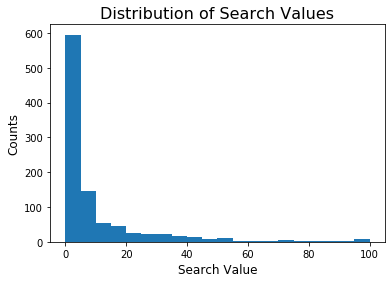

In [48]:
total = pd.concat([blp, cc, cra, daca, ldc, nkw, rr, utr])
ax = total.value.hist(bins = 20, grid = False)
ax.set_title('Distribution of Search Values', fontsize = 16)
ax.set_xlabel('Search Value', fontsize = 12)
ax.set_ylabel('Counts', fontsize = 12)
fig = ax.figure
fig.savefig('Histogram.png')
plt.show()

In [51]:
total['log_value'] = total.value.apply(lambda x : np.log(x + .001))

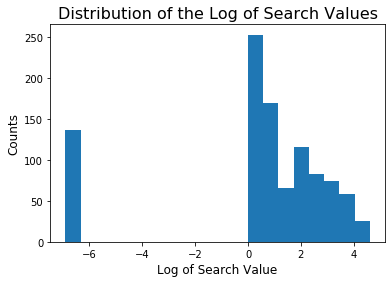

In [58]:
ax = total.log_value.hist(bins = 20, grid = False)
ax.set_title('Distribution of the Log of Search Values', fontsize = 16)
ax.set_xlabel('Log of Search Value', fontsize = 12)
ax.set_ylabel('Counts', fontsize = 12)
fig = ax.figure
fig.savefig('Histogram_2.png')
plt.show()